In [1]:
%store -r jhj_emoji_texts
%store -r jhj_emoji_labels

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
import pandas as pd

In [3]:
len(jhj_emoji_texts)

858

In [4]:
#######clean#######
from num2words import num2words
#convert everything to lowercase
jhj_emoji_texts = [x.lower() for x in jhj_emoji_texts]
#exchange numbers with their string representation
#make numbers to text
temp = []
without_num = []
for post in jhj_emoji_texts:
    for word in post.split(" "):
        if word.isdigit():
            #print(word)
            word = num2words(word, lang="de")
        temp.append(word)
    without_num.append((' '.join(temp)))
    temp = []
jhj_emoji_texts = without_num

In [5]:
#######feature extraction#########

In [6]:
#without deleting stopwords
#ngram feature matrices

#unigram
uni_vectorizer = CountVectorizer(ngram_range=(1,1))
unigram_feature_vector = uni_vectorizer.fit_transform(jhj_emoji_texts).toarray() 

#uni and bigram
uni_bi_vectorizer = CountVectorizer(ngram_range=(1,2))
unigram_bi_feature_vector = uni_bi_vectorizer.fit_transform(jhj_emoji_texts).toarray() 

#bigram
bi_vectorizer = CountVectorizer(ngram_range=(2,2))
bigram_feature_vector = bi_vectorizer.fit_transform(jhj_emoji_texts).toarray()


#trigram
tri_vectorizer = CountVectorizer(ngram_range=(2,2))
trigram_feature_vector = tri_vectorizer.fit_transform(jhj_emoji_texts).toarray() 

In [7]:
import pandas as pd
df = pd.DataFrame (unigram_feature_vector, columns = uni_vectorizer.get_feature_names())
bi_vectorizer.get_feature_names()

['00 00',
 '00 uhr',
 '00 was',
 '000 zahle',
 '08 15',
 '10 10',
 '10 daddy',
 '10 flixbus',
 '10 geschenk',
 '10 jahren',
 '10 januar',
 '10 karstadtistzuteuer',
 '10 lauter',
 '10 mal',
 '10 umzugskartons',
 '100 ausspuckt',
 '100 deren',
 '100 oder',
 '100 versaufen',
 '12 2019',
 '12 von',
 '1200 zur',
 '13 dachte',
 '13 jährigen',
 '14 30',
 '14 steigt',
 '15 alles',
 '15 bis',
 '15 dass',
 '15 gutscheine',
 '15 keinen',
 '15 soviel',
 '15 typ',
 '16qm am',
 '17 15',
 '17 20',
 '18 00',
 '18 19',
 '19 35',
 '19 auch',
 '19 jhd',
 '19h und',
 '20 abzugeben',
 '20 am',
 '20 frauen',
 '20 vom',
 '2000 netto',
 '200k einwohnern',
 '2019 haben',
 '21 schwarz',
 '21h noch',
 '22 uhr',
 '24 habe',
 '24 ungeküsst',
 '24 vietnamesin',
 '25 beste',
 '27 eine',
 '28 leicester',
 '29 beste',
 '2h sry',
 '2pdfs weiß',
 '2x angerufen',
 '30 12',
 '30 juni',
 '30 nicht',
 '30 schenken',
 '30 zeit',
 '33 uhr',
 '35 000',
 '35 überwiesen',
 '40 bezahlen',
 '40personen oder',
 '46 ghz',
 '4b himbe

In [8]:
#ngram feature matrices

#unigram
#uni_vectorizer = CountVectorizer(stop_words=stopwords.words('german'), ngram_range=(1,1))
#unigram_feature_vector = uni_vectorizer.fit_transform(jhj_emoji_texts).toarray() 

#uni and bigram
#uni_bi_vectorizer = CountVectorizer(stop_words=stopwords.words('german'), ngram_range=(1,2))
#unigram_bi_feature_vector = uni_bi_vectorizer.fit_transform(jhj_emoji_texts).toarray() 

#bigram
#bi_vectorizer = CountVectorizer(stop_words=stopwords.words('german'), ngram_range=(2,2))
#bigram_feature_vector = bi_vectorizer.fit_transform(jhj_emoji_texts).toarray()


#trigram
#tri_vectorizer = CountVectorizer(stop_words=stopwords.words('german'), ngram_range=(2,2))
#trigram_feature_vector = tri_vectorizer.fit_transform(jhj_emoji_texts).toarray() 


In [9]:
#print data frame to see whether preprocessing changes the content, also look it up 

In [10]:
#tfidf vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('german'))
tfidf = tfidf_vectorizer.fit_transform(jhj_emoji_texts).toarray() #feature matrix


In [11]:
#tfidf vectorizer ohne stopwords zu löschen
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(jhj_emoji_texts).toarray() #feature matrix

In [12]:
#numerical features
#average length of post, average sentence length, average number of punctuation
#punctuation weg lassen weil nicht wirklich aussagekräftig


import numpy
import string
from nltk import tokenize

post_length = [] #feature vector
counter = 0
number_of_punct = [] #feature vector
sentence_lengths = [] 
tokenized_posts = []
for text in jhj_emoji_texts:
    post_length.append([len(text.split())])
    tokenized_posts.append(tokenize.sent_tokenize(text))
    for char in text:
        if char in string.punctuation:
            counter+=1
    number_of_punct.append([counter])
    counter = 0
sent = []
for post in tokenized_posts:
    for sentence in post:
        sent.append(len(sentence.split()))
    sentence_lengths.append(sent)
    sent = []
#get average
average_sent_len = [] #feature vector
for post in sentence_lengths:
    average_sent_len.append([sum(post)/len(post)])    
print(len(sentence_lengths)) #why 2169?? need:1269 need one number, maybe the average sentence length?
#print(average_sent_len)
#print(sentence_lengths)

858


In [28]:
#POS features
import spacy
nlp = spacy.load('de_core_news_md')

#get POStags via spacy
spacy_obj = []
post_as_pos_tags = []
as_pos = [] #this
for text in jhj_emoji_texts:
    spacy_obj.append(nlp(text))
for text in spacy_obj:
    for token in text:
        post_as_pos_tags.append(token.tag_)
    as_pos.append(' '.join(post_as_pos_tags))
    post_as_pos_tags = []

#neue POS-features
ADV_count = []
PPER_count = []
comma_count = []
NE_count = []
NN_count = []
ADJD_count = []
for post in as_pos:
    ADV_count.append([post.count("ADV")])
    PPER_count.append([post.count("PPER")])
    comma_count.append([post.count("$,")])
    NE_count.append([post.count("NE")])
    NN_count.append([post.count("NN")])
    ADJD_count.append([post.count("ADJD")])
    
print(len(ADJD_count))

#get posts as sequence of pos tags
#as_pos = sequence of pos tags
#make sequences into count vectorizers
pos_vec_uni = CountVectorizer(ngram_range=(1,1))
pos_uni_count_vec = pos_vec_uni.fit_transform(as_pos).toarray() #uni feature vector
pos_vec_bi = CountVectorizer(ngram_range=(2,2))
pos_bi_count_vec = pos_vec_bi.fit_transform(as_pos).toarray() #bi feature vector
#make theminto tfidf vectorizers
tfidf_vectorizer_pos = TfidfVectorizer()
tfidf_pos = tfidf_vectorizer_pos.fit_transform(as_pos) #tfidf pos feature matrix hat das iwelche benefits??

858


In [14]:
#try wordvectors instead of ngrams as feature?

spacy_posts = []
vector_posts = []
temp_post = []
for post in jhj_emoji_texts:
    spacy_posts.append(nlp(post))
for post in spacy_posts:
    for word in post:
        temp_post.append(word.vector)
    vector_posts.append(temp_post)
    temp_post = []
    
mean_vector_posts = []
for post_list in vector_posts:
    #print(len(post))
    mean_vector_posts.append([sum(post_list)/len(post_list)])
    
word_vector_feature = numpy.concatenate(mean_vector_posts, axis=0)
        


In [15]:
###################combine feature-vectors:##########################

In [29]:
#combine feature-vectors:

#uni-grams
#unigram_feature_vector

#bigrams
#bigram_feature_vector

#trigrams
#trigram_feature_vector

#unigrams and bigrams
#unigram_bigram_feature_vector

#uni-grams, bigrams, trigrams
uni_bi_tri_feat_vec = numpy.append(unigram_feature_vector, bigram_feature_vector, 1)
uni_bi_tri_feat_vec = numpy.append(uni_bi_tri_feat_vec,trigram_feature_vector, 1)


#unigrams, trigrams
uni_tri_feat_vec = numpy.append(unigram_feature_vector, trigram_feature_vector, 1)
#bigrams, trigams
bi_tri_feat_vec = numpy.append(bigram_feature_vector, trigram_feature_vector, 1)



#neue POS-features
pos = numpy.append(ADV_count, PPER_count, 1)
pos = numpy.append(pos, comma_count, 1)
pos = numpy.append(pos, NE_count, 1)
pos = numpy.append(pos, NN_count, 1)
pos = numpy.append(pos, ADJD_count, 1)


#ngrams and POS features
uni_pos_new = numpy.append(unigram_feature_vector, pos, 1)
bi_new_pos = numpy.append(bigram_feature_vector, pos, 1)
tri_new_pos = numpy.append(trigram_feature_vector, pos, 1)

#numerical features
#sentence_length
post_sent = numpy.append(post_length, average_sent_len, 1)
post_sent_punct = numpy.append(post_sent, number_of_punct, 1)

#POS and numerical features
pos_post_sent_len = numpy.append(pos, post_sent, 1)
pos_num = numpy.append(post_sent_punct, pos, 1)


#unigrams with numerical features
uni_postlegth_feat_vec = numpy.append(unigram_feature_vector, post_length, 1)
uni_punct = numpy.append(unigram_feature_vector, number_of_punct, 1)
uni_sent_len = numpy.append(unigram_feature_vector, average_sent_len, 1)
uni_post_sent_len = numpy.append(unigram_feature_vector, post_sent, 1)
uni_num = numpy.append(unigram_feature_vector, post_sent_punct, 1)

#bigrams with numerical features
bi_post = numpy.append(bigram_feature_vector, post_length, 1)
bi_sent = numpy.append(bigram_feature_vector, average_sent_len, 1)
bi_punct = numpy.append(bigram_feature_vector, number_of_punct, 1)
bi_sent_post = numpy.append(bigram_feature_vector, post_sent, 1)
bi_num = numpy.append(bigram_feature_vector, post_sent_punct, 1)

#trigrams with numerical features
tri_post = numpy.append(trigram_feature_vector, post_length, 1)
tri_sent = numpy.append(trigram_feature_vector, average_sent_len, 1)
tri_punct = numpy.append(trigram_feature_vector, number_of_punct, 1)
tri_sent_post = numpy.append(trigram_feature_vector, post_sent, 1)
tri_num = numpy.append(trigram_feature_vector, post_sent_punct, 1)


#unigrams, bigrams, numerical features
uni_bi_post = numpy.append(unigram_bi_feature_vector, post_length, 1)
uni_bi_sent = numpy.append(unigram_bi_feature_vector, average_sent_len, 1)
uni_bi_punct = numpy.append(unigram_bi_feature_vector, number_of_punct, 1)
uni_bi_sent_post = numpy.append(unigram_bi_feature_vector, post_sent, 1)
uni_bi_num = numpy.append(unigram_bi_feature_vector, post_sent_punct, 1)

#ngrams with POS and numericals
uni_post_sent_pos = numpy.append(uni_post_sent_len, pos, 1)
bi_post_sent_pos = numpy.append(bi_sent_post, pos, 1)
tri_post_sent_pos = numpy.append(tri_sent_post, pos, 1)


#wordvectors : word_vector_feature

#wordvectors and ngrams
uni_wordvector = numpy.append(unigram_feature_vector, word_vector_feature, 1)
bi_wordvector = numpy.append(bigram_feature_vector, word_vector_feature, 1)
tri_wordvector = numpy.append(trigram_feature_vector, word_vector_feature, 1)

#wordvectors and numerical features
wordvector_post = numpy.append(word_vector_feature, post_length, 1)
wordvector_sent = numpy.append(word_vector_feature, average_sent_len, 1)
wordvector_post_sent = numpy.append(word_vector_feature, post_sent, 1)
wordvector_post_sent_punct = numpy.append(word_vector_feature, post_sent_punct, 1)

#wordvectors and POS features
wordvector_pos = numpy.append(word_vector_feature, pos, 1)
#wordvectors and POS features and numericals
wordvector_pos_num =  numpy.append(wordvector_post_sent , pos, 1)
wordvector_pos_num =  numpy.append(wordvector_pos_num , number_of_punct, 1)

#wordvectors and tfidf
wordvector_tfidf = numpy.append(word_vector_feature, tfidf, 1)

In [30]:
#################logistic regression##################

In [31]:
#test balanced class weights

#unigrams
X = tfidf #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced')
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 28
[[ 24  14]
 [ 14 120]]
              precision    recall  f1-score   support

           0       0.63      0.63      0.63        38
           1       0.90      0.90      0.90       134

    accuracy                           0.84       172
   macro avg       0.76      0.76      0.76       172
weighted avg       0.84      0.84      0.84       172

accuracy score:  0.8372093023255814


In [32]:
#3880 sind die verschiedenen worte
import pandas as pd
pd.DataFrame(bigram_feature_vector, columns=bi_vectorizer.get_feature_names())


,00 00,00 uhr,00 was,000 zahle,08 15,10 10,10 daddy,10 flixbus,10 geschenk,10 jahren,...,überrascht von,überrascht wie,übers wochenende,überspringen sich,übertrieben lust,überwiesen bekommen,überwindung gekostet,üblichen hitler,übrig uns,übrigens auch
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


feature:  gerade  score:  0.8101654839280588
feature:  jetzt  score:  1.223768602748592
feature:  lust  score:  1.0144876679144346
feature:  meinen  score:  0.9170042281433811
feature:  nur  score:  0.9238682703862068
feature:  sein  score:  0.9849367934635365


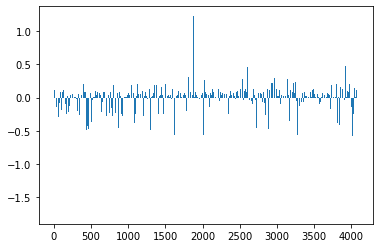

In [33]:

# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X = unigram_feature_vector #data
y = jhj_emoji_labels#target
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
for score,name in zip(importance, uni_vectorizer.get_feature_names()):
    if score > 0.80:
        print("feature: ", name, " score: ", score)
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

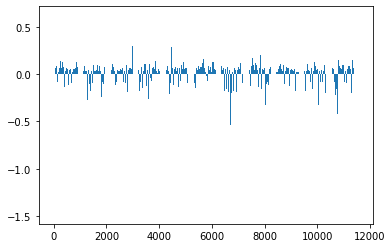

In [37]:

# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X = bigram_feature_vector #data
y = jhj_emoji_labels#target
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
for score,name in zip(importance, uni_vectorizer.get_feature_names()):
    if score > 0.70:
        print("feature: ", name, " score: ", score)
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.08778
Feature: 1, Score: 0.07191
Feature: 2, Score: 0.09141
Feature: 3, Score: 0.06385
Feature: 4, Score: -0.08275
Feature: 5, Score: 0.28912


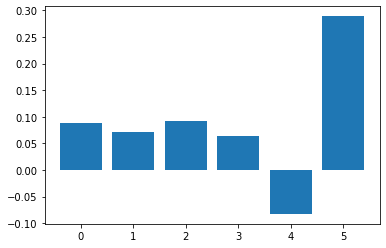

In [35]:

# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X = pos #data
y = jhj_emoji_labels#target
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
#for score,name in zip(importance, uni_vectorizer.get_feature_names()):
 #   if score < -0.6:
        #print("feature: ", name, " score: ", score)
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: -0.00832
Feature: 1, Score: 0.07751
Feature: 2, Score: -0.05423


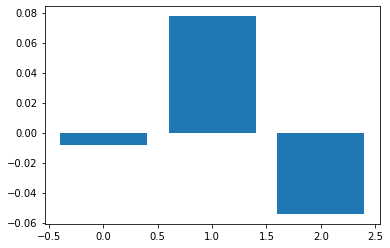

In [16]:

# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X = post_sent_punct #data
y = jhj_emoji_labels#target
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
#for score,name in zip(importance, uni_vectorizer.get_feature_names()):
 #   if score < -0.6:
        #print("feature: ", name, " score: ", score)
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#post_sent = numpy.append(post_length, average_sent_len, 1)
#post_sent_punct = numpy.append(post_sent, number_of_punct, 1)

Feature: 0, Score: 0.45703
Feature: 1, Score: 0.79132
Feature: 2, Score: 0.04121
Feature: 3, Score: -0.34565
Feature: 4, Score: 0.07490
Feature: 5, Score: 0.08345
Feature: 6, Score: -0.48703
Feature: 7, Score: -0.01140
Feature: 8, Score: 0.17524
Feature: 9, Score: -0.06040
Feature: 10, Score: -0.10564
Feature: 11, Score: -0.28655
Feature: 12, Score: -0.64862
Feature: 13, Score: -0.38420
Feature: 14, Score: 0.15991
Feature: 15, Score: -0.48304
Feature: 16, Score: 0.62602
Feature: 17, Score: -0.21458
Feature: 18, Score: 0.57268
Feature: 19, Score: -0.04151
Feature: 20, Score: 0.72740
Feature: 21, Score: 1.09670
Feature: 22, Score: -0.25967
Feature: 23, Score: 0.40695
Feature: 24, Score: -0.15929
Feature: 25, Score: 0.08047
Feature: 26, Score: 0.04740
Feature: 27, Score: 0.42538
Feature: 28, Score: -0.49946
Feature: 29, Score: 0.56763
Feature: 30, Score: -0.20690
Feature: 31, Score: 0.17904
Feature: 32, Score: -0.12729
Feature: 33, Score: -0.15054
Feature: 34, Score: 0.12183
Feature: 35, 

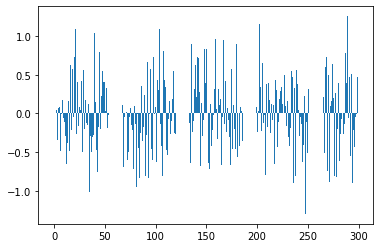

In [17]:

# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X = word_vector_feature #data
y = jhj_emoji_labels#target
# define the model
model = LogisticRegression(max_iter=300)
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
#for score,name in zip(importance, uni_vectorizer.get_feature_names()):
 #   if score < -0.6:
        #print("feature: ", name, " score: ", score)
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#post_sent = numpy.append(post_length, average_sent_len, 1)
#post_sent_punct = numpy.append(post_sent, number_of_punct, 1)

feature:  es ist  score:  0.614767138681609
feature:  ich hab  score:  0.5229178933137119
feature:  ich liebe  score:  0.5027960524481465
feature:  lust auf  score:  0.5633301295135077
feature:  nur noch  score:  0.5008300983285584


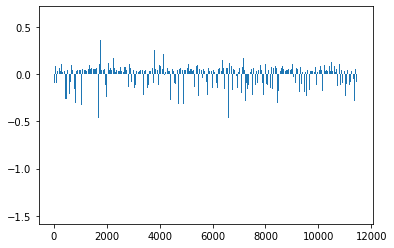

In [23]:

# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X = bigram_feature_vector #data
y = jhj_emoji_labels#target
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
for score,name in zip(importance, bi_vectorizer.get_feature_names()):
    if score > 0.5:
        print("feature: ", name, " score: ", score)
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

3881
3881
feature:  empfehlen  score:  0.02966237431899547
feature:  gibt  score:  0.02867920876154195
feature:  jemand  score:  0.12395843054594369
feature:  tipps  score:  0.026260855681673648


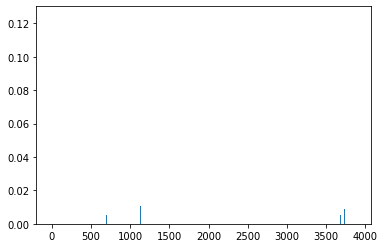

In [19]:
#decision tree for feature importance

# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
X = unigram_feature_vector #data
y = jhj_emoji_labels#target
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
print(len(importance))
print(len(uni_vectorizer.get_feature_names()))
# summarize feature importance
for score,name in zip(importance, uni_vectorizer.get_feature_names()):
    if score>0.02:
        print("feature: ", name, " score: ", score)
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

6
3881
Feature: 0, Score: 0.17920
Feature: 1, Score: 0.04550
Feature: 2, Score: 0.19211
Feature: 3, Score: 0.19656
Feature: 4, Score: 0.27779
Feature: 5, Score: 0.10884


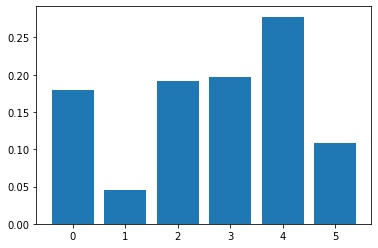

In [20]:
#decision tree for feature importance

# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
X = pos #data
y = jhj_emoji_labels#target
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
print(len(importance))
print(len(uni_vectorizer.get_feature_names()))
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

3
3881
Feature: 0, Score: 0.29665
Feature: 1, Score: 0.38017
Feature: 2, Score: 0.32319


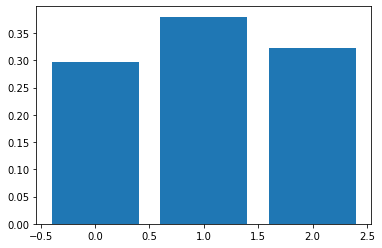

In [21]:
#decision tree for feature importance

# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
X = post_sent_punct#data
y = jhj_emoji_labels#target
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
print(len(importance))
print(len(uni_vectorizer.get_feature_names()))
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [48]:
#test balanced class weights

#unigrams
X = tfidf #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced')
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 26
[[ 21  17]
 [  9 125]]
              precision    recall  f1-score   support

           0       0.70      0.55      0.62        38
           1       0.88      0.93      0.91       134

    accuracy                           0.85       172
   macro avg       0.79      0.74      0.76       172
weighted avg       0.84      0.85      0.84       172

accuracy score:  0.8488372093023255


In [49]:
#test balanced class weights

#unigrams
X = unigram_feature_vector#data
y = jhj_emoji_labels#target
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=10, random_state=1, shuffle=True)

# create model
model = LogisticRegression(class_weight='balanced')
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: 0.809 (0.033)


In [50]:
#test balanced class weights

#unigrams
X = bigram_feature_vector #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced')
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 35
[[  3  35]
 [  0 134]]
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        38
           1       0.79      1.00      0.88       134

    accuracy                           0.80       172
   macro avg       0.90      0.54      0.52       172
weighted avg       0.84      0.80      0.72       172

accuracy score:  0.7965116279069767


In [51]:
#test balanced class weights

#unigrams
X = trigram_feature_vector #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced')
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 35
[[  3  35]
 [  0 134]]
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        38
           1       0.79      1.00      0.88       134

    accuracy                           0.80       172
   macro avg       0.90      0.54      0.52       172
weighted avg       0.84      0.80      0.72       172

accuracy score:  0.7965116279069767


In [52]:
#test balanced class weights

#unigrams
X = unigram_bi_feature_vector #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced')
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 25
[[ 22  16]
 [  9 125]]
              precision    recall  f1-score   support

           0       0.71      0.58      0.64        38
           1       0.89      0.93      0.91       134

    accuracy                           0.85       172
   macro avg       0.80      0.76      0.77       172
weighted avg       0.85      0.85      0.85       172

accuracy score:  0.8546511627906976


In [53]:
#test balanced class weights

#unigrams
X = uni_bi_tri_feat_vec #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced')
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 25
[[ 19  19]
 [  6 128]]
              precision    recall  f1-score   support

           0       0.76      0.50      0.60        38
           1       0.87      0.96      0.91       134

    accuracy                           0.85       172
   macro avg       0.82      0.73      0.76       172
weighted avg       0.85      0.85      0.84       172

accuracy score:  0.8546511627906976


In [54]:
#test balanced class weights

#unigrams
X = bi_tri_feat_vec #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced')
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 35
[[  3  35]
 [  0 134]]
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        38
           1       0.79      1.00      0.88       134

    accuracy                           0.80       172
   macro avg       0.90      0.54      0.52       172
weighted avg       0.84      0.80      0.72       172

accuracy score:  0.7965116279069767


In [55]:
#test balanced class weights

#unigrams
X = uni_tri_feat_vec #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced')
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 25
[[ 22  16]
 [  9 125]]
              precision    recall  f1-score   support

           0       0.71      0.58      0.64        38
           1       0.89      0.93      0.91       134

    accuracy                           0.85       172
   macro avg       0.80      0.76      0.77       172
weighted avg       0.85      0.85      0.85       172

accuracy score:  0.8546511627906976


In [56]:
#test balanced class weights

#unigrams
X = pos #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced')
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 76
[[21 17]
 [59 75]]
              precision    recall  f1-score   support

           0       0.26      0.55      0.36        38
           1       0.82      0.56      0.66       134

    accuracy                           0.56       172
   macro avg       0.54      0.56      0.51       172
weighted avg       0.69      0.56      0.60       172

accuracy score:  0.5581395348837209


In [57]:
#test balanced class weights

#unigrams
X = uni_pos_new #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced')
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 31
[[ 23  15]
 [ 16 118]]
              precision    recall  f1-score   support

           0       0.59      0.61      0.60        38
           1       0.89      0.88      0.88       134

    accuracy                           0.82       172
   macro avg       0.74      0.74      0.74       172
weighted avg       0.82      0.82      0.82       172

accuracy score:  0.8197674418604651


In [58]:
#test balanced class weights

#unigrams
X = bi_new_pos #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced')
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 33
[[  8  30]
 [  3 131]]
              precision    recall  f1-score   support

           0       0.73      0.21      0.33        38
           1       0.81      0.98      0.89       134

    accuracy                           0.81       172
   macro avg       0.77      0.59      0.61       172
weighted avg       0.79      0.81      0.76       172

accuracy score:  0.8081395348837209


In [59]:
#test balanced class weights

#unigrams
X = tri_new_pos #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced')
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 33
[[  8  30]
 [  3 131]]
              precision    recall  f1-score   support

           0       0.73      0.21      0.33        38
           1       0.81      0.98      0.89       134

    accuracy                           0.81       172
   macro avg       0.77      0.59      0.61       172
weighted avg       0.79      0.81      0.76       172

accuracy score:  0.8081395348837209


In [60]:
#test balanced class weights

#unigrams
X = post_sent #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced')
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 85
[[23 15]
 [70 64]]
              precision    recall  f1-score   support

           0       0.25      0.61      0.35        38
           1       0.81      0.48      0.60       134

    accuracy                           0.51       172
   macro avg       0.53      0.54      0.48       172
weighted avg       0.69      0.51      0.55       172

accuracy score:  0.5058139534883721


In [61]:
#test balanced class weights

#unigrams
X = post_sent_punct #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced')
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 79
[[23 15]
 [64 70]]
              precision    recall  f1-score   support

           0       0.26      0.61      0.37        38
           1       0.82      0.52      0.64       134

    accuracy                           0.54       172
   macro avg       0.54      0.56      0.50       172
weighted avg       0.70      0.54      0.58       172

accuracy score:  0.5406976744186046


In [62]:
#test balanced class weights

#unigrams
X = pos_post_sent_len #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced')
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 64
[[25 13]
 [51 83]]
              precision    recall  f1-score   support

           0       0.33      0.66      0.44        38
           1       0.86      0.62      0.72       134

    accuracy                           0.63       172
   macro avg       0.60      0.64      0.58       172
weighted avg       0.75      0.63      0.66       172

accuracy score:  0.627906976744186


In [63]:
#test balanced class weights

#unigrams
X = pos_num #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced')
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 59
[[24 14]
 [45 89]]
              precision    recall  f1-score   support

           0       0.35      0.63      0.45        38
           1       0.86      0.66      0.75       134

    accuracy                           0.66       172
   macro avg       0.61      0.65      0.60       172
weighted avg       0.75      0.66      0.68       172

accuracy score:  0.6569767441860465


In [64]:
#test balanced class weights

#unigrams
X = uni_num #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced', max_iter = 300)
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 26
[[ 23  15]
 [ 11 123]]
              precision    recall  f1-score   support

           0       0.68      0.61      0.64        38
           1       0.89      0.92      0.90       134

    accuracy                           0.85       172
   macro avg       0.78      0.76      0.77       172
weighted avg       0.84      0.85      0.85       172

accuracy score:  0.8488372093023255


In [65]:
#test balanced class weights

#unigrams
X =uni_post_sent_len#data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced', max_iter = 300)
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 28
[[ 22  16]
 [ 12 122]]
              precision    recall  f1-score   support

           0       0.65      0.58      0.61        38
           1       0.88      0.91      0.90       134

    accuracy                           0.84       172
   macro avg       0.77      0.74      0.75       172
weighted avg       0.83      0.84      0.83       172

accuracy score:  0.8372093023255814


In [66]:
#test balanced class weights

#unigrams
X = bi_num #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced', max_iter=300)
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 43
[[  6  32]
 [ 11 123]]
              precision    recall  f1-score   support

           0       0.35      0.16      0.22        38
           1       0.79      0.92      0.85       134

    accuracy                           0.75       172
   macro avg       0.57      0.54      0.53       172
weighted avg       0.70      0.75      0.71       172

accuracy score:  0.75


In [67]:
#test balanced class weights

#unigrams
X = tri_post_sent_pos #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced', max_iter = 300)
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 39
[[ 14  24]
 [ 15 119]]
              precision    recall  f1-score   support

           0       0.48      0.37      0.42        38
           1       0.83      0.89      0.86       134

    accuracy                           0.77       172
   macro avg       0.66      0.63      0.64       172
weighted avg       0.75      0.77      0.76       172

accuracy score:  0.7732558139534884


In [69]:
#test balanced class weights

#unigrams
X = word_vector_feature #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced', max_iter=400)
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 25
[[ 29   9]
 [ 16 118]]
              precision    recall  f1-score   support

           0       0.64      0.76      0.70        38
           1       0.93      0.88      0.90       134

    accuracy                           0.85       172
   macro avg       0.79      0.82      0.80       172
weighted avg       0.87      0.85      0.86       172

accuracy score:  0.8546511627906976


In [47]:
#test balanced class weights

#unigrams
X = uni_wordvector #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced', max_iter=300)
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 30
[[ 26  12]
 [ 18 116]]
              precision    recall  f1-score   support

           0       0.59      0.68      0.63        38
           1       0.91      0.87      0.89       134

    accuracy                           0.83       172
   macro avg       0.75      0.77      0.76       172
weighted avg       0.84      0.83      0.83       172

accuracy score:  0.8255813953488372


In [51]:
#test balanced class weights

#unigrams
X = tri_wordvector #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced')
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 12
[[ 35   3]
 [  9 125]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.85        38
           1       0.98      0.93      0.95       134

    accuracy                           0.93       172
   macro avg       0.89      0.93      0.90       172
weighted avg       0.94      0.93      0.93       172

accuracy score:  0.9302325581395349


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [1]:
#test balanced class weights

#unigrams
X = wordvector_pos_num #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced')
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

NameError: name 'wordvector_pos_num' is not defined

In [23]:
#test balanced class weights

#unigrams
X = pos_bi_count_vec #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced')
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 37
[[ 25  13]
 [ 24 110]]
              precision    recall  f1-score   support

           0       0.51      0.66      0.57        38
           1       0.89      0.82      0.86       134

    accuracy                           0.78       172
   macro avg       0.70      0.74      0.72       172
weighted avg       0.81      0.78      0.79       172

accuracy score:  0.7848837209302325


In [22]:

#test balanced class weights

#unigrams
X = pos_uni_count_vec #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced')
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 53
[[24 14]
 [39 95]]
              precision    recall  f1-score   support

           0       0.38      0.63      0.48        38
           1       0.87      0.71      0.78       134

    accuracy                           0.69       172
   macro avg       0.63      0.67      0.63       172
weighted avg       0.76      0.69      0.71       172

accuracy score:  0.6918604651162791


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [24]:


#test balanced class weights

#unigrams
X = tfidf_pos #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced')
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 52
[[25 13]
 [39 95]]
              precision    recall  f1-score   support

           0       0.39      0.66      0.49        38
           1       0.88      0.71      0.79       134

    accuracy                           0.70       172
   macro avg       0.64      0.68      0.64       172
weighted avg       0.77      0.70      0.72       172

accuracy score:  0.6976744186046512


In [29]:



#test balanced class weights

#unigrams
X = wordvector_tfidf  #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced')
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 24
[[ 29   9]
 [ 15 119]]
              precision    recall  f1-score   support

           0       0.66      0.76      0.71        38
           1       0.93      0.89      0.91       134

    accuracy                           0.86       172
   macro avg       0.79      0.83      0.81       172
weighted avg       0.87      0.86      0.86       172

accuracy score:  0.8604651162790697


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:



#test balanced class weights

#unigrams
X = word_vector_feature #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced')
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 23
[[ 30   8]
 [ 15 119]]
              precision    recall  f1-score   support

           0       0.67      0.79      0.72        38
           1       0.94      0.89      0.91       134

    accuracy                           0.87       172
   macro avg       0.80      0.84      0.82       172
weighted avg       0.88      0.87      0.87       172

accuracy score:  0.8662790697674418


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [35]:



#test balanced class weights

#unigrams
X = word_vector_feature #data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model

dec_tree = DecisionTreeClassifier(class_weight='balanced')
y_pred = dec_tree.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 32
[[ 24  14]
 [ 18 116]]
              precision    recall  f1-score   support

           0       0.57      0.63      0.60        38
           1       0.89      0.87      0.88       134

    accuracy                           0.81       172
   macro avg       0.73      0.75      0.74       172
weighted avg       0.82      0.81      0.82       172

accuracy score:  0.813953488372093


In [40]:
#test balanced class weights

#unigrams
X =unigram_feature_vector#data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

logregr = LogisticRegression(class_weight='balanced', max_iter = 300)
y_pred = logregr.fit(X_train, y_train).predict(X_test)

#evaluation
print("UNIGRAMS AS FEATURES")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

UNIGRAMS AS FEATURES
Number of mislabeled points out of a total 172 points : 32
[[ 24  14]
 [ 18 116]]
              precision    recall  f1-score   support

           0       0.57      0.63      0.60        38
           1       0.89      0.87      0.88       134

    accuracy                           0.81       172
   macro avg       0.73      0.75      0.74       172
weighted avg       0.82      0.81      0.82       172

accuracy score:  0.813953488372093


In [38]:
#############tuning############

score:  0.9533799533799534
improved
Number of mislabeled points out of a total 172 points : 29
[[ 22  16]
 [ 13 121]]
              precision    recall  f1-score   support

           0       0.63      0.58      0.60        38
           1       0.88      0.90      0.89       134

    accuracy                           0.83       172
   macro avg       0.76      0.74      0.75       172
weighted avg       0.83      0.83      0.83       172

accuracy score:  0.8313953488372093


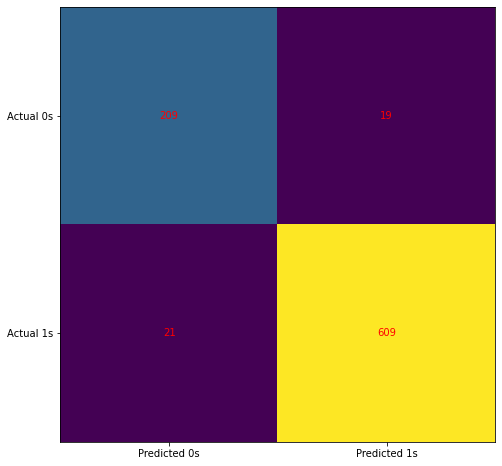

In [57]:
import matplotlib
import matplotlib.pyplot as plt
#unigrams
X = unigram_feature_vector#data
y = jhj_emoji_labels#target

#seperate test and training ->20%test 80%training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train and fit model
from sklearn.linear_model import LogisticRegression

improved_model = LogisticRegression(class_weight='balanced', penalty='l2', C=0.5)
y_pred = improved_model.fit(X_train, y_train).predict(X_test)
print("score: ", improved_model.score(X,y))
#evaluation
print("improved")
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y, improved_model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [48]:
########plotting#############

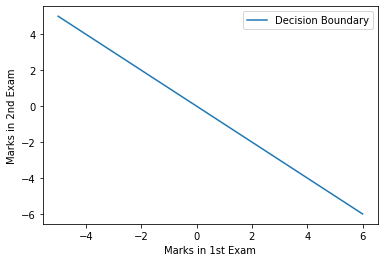

In [63]:
x_values = [numpy.min(X[:, 1] - 5), numpy.max(X[:, 2] + 5)]
y_values = - (y_pred[0] + numpy.dot(y_pred[1], x_values)) / y_pred[2]

#x_values =X
#y_values =y
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

In [69]:
import numpy as np
# Plotting the decision boundary
fig = plt.figure(figsize=(10,7))
x_values = [np.min(X_train[:,] -50 ), np.max(X_train[:,] +50 )]
y_values = np.dot((-1./y_pred[1]), (np.dot(y_pred[0],x_values) + y_pred))
colors=['red' if l==0 else 'blue' for l in y_train]
plt.scatter(X_train[:, 0], X_train[:, 1], label='Logistics regression', color=colors)
plt.plot(x_values, y_values, label='Decision Boundary')
plt.show()

ValueError: operands could not be broadcast together with shapes (2,) (172,) 

<Figure size 720x504 with 0 Axes>